In [ ]:
from nbdev import *
%nbdev_default_export callbacks

Cells will be exported to srthesis.callbacks,
unless a different module is specified after an export flag: `%nbdev_export special.module`


# Callbacks



In [ ]:
%nbdev_export_internal
from fastai.vision import *
from srthesis.data import *

## Save predicted image (same size)

Allow to compare model predictions throughout training by predicting image of the same size.

In [ ]:
%nbdev_export_internal
path_dataset = Path('datasets/DIV2K')
path_hr = path_dataset/'images'

src = (
    ImageImageList.from_folder(path_hr)
                    .split_by_folder(train="Train", valid="Validation")
)

images = src.valid.items

In [ ]:
%nbdev_export

def resize_keep_ar(img, max_size = 1024):
    w,h = img.shape[1], img.shape[2]
    rw = max_size / w
    rh = max_size / h
    rmin = min(rw,rh)
    w = int(round(w * rmin))
    h = int(round(h * rmin))
    return img.resize((img.shape[0], w, h)).refresh()

def image_for_prediction(idx:int):
    img = open_image(images[idx]);
    img_lr = resize_keep_ar(img, 400) 
    img_lr = resize_keep_ar(img_lr, 800)
    return img_lr

In [ ]:
%nbdev_export
class SaveTestImageCallback(LearnerCallback):
    def __init__(self, learn:Learner, path:Path, images:List[Image], save_epochs:int = 5, max_img_size=1024):
        self.learn, self.path, self.images, self.save_epochs = learn, path, images, save_epochs
        self.path.mkdir(parents=True, exist_ok=True)
        self.epoch = 0
        
        #need to set dataset
        
    def on_epoch_end(self, **kwargs):
        self.epoch += 1
        self.learn.model.eval()
        torch.cuda.empty_cache()
        with torch.no_grad():
            for i, img in enumerate(self.images):
                self.learn.data.single_ds.tfmargs['size'] = [imgs[0].shape[1],imgs[0].shape[2]]
                batch = self.learn.data.one_item(imgs[0], detach=True, denorm=False, cpu=False)
                #p,img_pred,b = self.learn.predict(img)
                res = self.pred_batch(batch=batch, with_dropout=False)
                raw_pred = grab_idx(res,0)
                raw_pred = self.data.denorm(raw_pred)
                pred = raw_pred.float().clamp(min=0,max=1)
                self._save_predicted(pred, i)
                del batch
        torch.cuda.empty_cache()
        gc.collect()
            
    def _save_predicted(self, img_pred:Tensor, img_id:int):
        x = image2np(img_pred*255).astype(np.uint8)
        filename = self.path / f"img{img_id}_e{self.epoch}.png"
        PIL.Image.fromarray(x).save(filename)

In [ ]:
imgs = np.array([image_for_prediction(idx) for idx in [0,1,16]])
#save_img_cb = SaveTestImageCallback(learn_gen, LOGGING_PATH/"predictions", imgs)

In [ ]:
#save_img_cb.on_epoch_end()

Images to be saved:

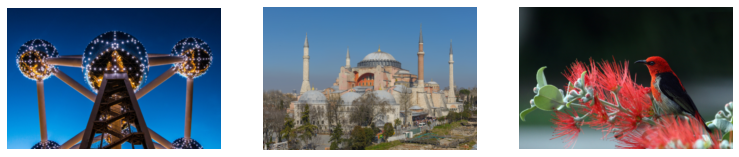

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(13,13))
for i, ax in enumerate(axes):
    ax.axis('off')
    ax.imshow(image2np(imgs[i].data))

In [ ]:
%nbdev_hide
notebook2script()

Converted 00_core.ipynb.
Converted 01_utils.ipynb.
Converted 0__template.ipynb.
Converted 10_data.ipynb.
Converted 11_div2k.ipynb.
Converted 12_realsr.ipynb.
Converted 20_metrics.ipynb.
Converted 21_loss.ipynb.
Converted 22_callbacks.ipynb.
Converted 23_tensorboard.ipynb.
Converted 31_generator_learner.ipynb.
Converted 32_critic_learner.ipynb.
Converted 41_generator_pretraining.ipynb.
Converted 42_critic_pretraining.ipynb.
Converted 43_gan_training.ipynb.
Converted augmentations.ipynb.
Converted graphs-tests.ipynb.
Converted sr reference.ipynb.
